# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [5]:
# 检查数据维度
data.shape

(112915, 11)

In [6]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [7]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\zzl96\AppData\Local\Temp\ipykernel_15404\2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [8]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [9]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape,X_test.shape

((76053, 10), (32595, 10))

In [10]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
y.value_counts()

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64

<Axes: xlabel='SeriousDlqin2yrs'>

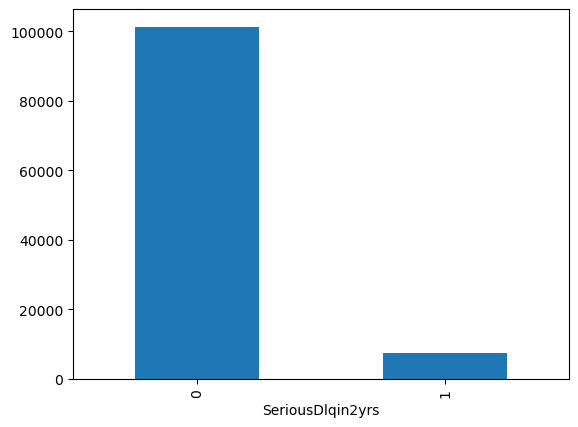

In [11]:
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
y.value_counts().plot.bar()

#### 2.数据预处理之离散化

In [12]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
import numpy as np
print(max(data['age']),min(data['age']))
#根据最大最小值和3的区间，确定要至少包含0和103，所以取0到106
age_sep = np.arange(0,106,3)
age_sep

103.0 0.0


array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105])

In [13]:
X_a = pd.DataFrame()
X_a['age_seped']=pd.cut(x=data['age'],bins=age_sep,include_lowest=True)
X_a.head()

,age_seped
0,"(42.0, 45.0]"
1,"(39.0, 42.0]"
2,"(36.0, 39.0]"
3,"(27.0, 30.0]"
4,"(48.0, 51.0]"


#### 3.数据预处理之独热向量编码

In [14]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_a = pd.get_dummies(X_a,dtype='float')
X_a.shape,X_a.head()

((108648, 35),
    age_seped_(-0.001, 3.0]  age_seped_(3.0, 6.0]  age_seped_(6.0, 9.0]  \
 0                      0.0                   0.0                   0.0   
 1                      0.0                   0.0                   0.0   
 2                      0.0                   0.0                   0.0   
 3                      0.0                   0.0                   0.0   
 4                      0.0                   0.0                   0.0   
 
    age_seped_(9.0, 12.0]  age_seped_(12.0, 15.0]  age_seped_(15.0, 18.0]  \
 0                    0.0                     0.0                     0.0   
 1                    0.0                     0.0                     0.0   
 2                    0.0                     0.0                     0.0   
 3                    0.0                     0.0                     0.0   
 4                    0.0                     0.0                     0.0   
 
    age_seped_(18.0, 21.0]  age_seped_(21.0, 24.0]  age_seped_(24.0, 

#### 4.数据预处理之幅度缩放

In [15]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
#获取了processed X
X_p = pd.merge(data.drop(columns=['SeriousDlqin2yrs','age']),X_a,left_index=True,right_index=True)

#完成了数据处理，再分别划分训练集和测试集
X_train, X_test, y_train, y_test = \
    train_test_split(X_p, y, test_size=0.3, random_state=0)

#将前9列进行幅度缩放(连续变量)，后35列（one-hot）直接连接
X_train_s = np.hstack((sts.fit_transform(X_train.iloc[:,0:9]),X_train.iloc[:,9:].values))
X_test_s  = np.hstack((sts.fit_transform(X_test.iloc[:,0:9]),X_test.iloc[:,9:].values))

X_train_s.shape,X_test_s.shape

((76053, 44), (32595, 44))

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [16]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, max_iter=1000, random_state=0)
lr.fit(X_train_s, y_train)

# 查看拟合后预测正确率
print(lr.score(X_test_s,y_test))

# 查看回归系数
pd.DataFrame(lr.coef_,columns = X_p.columns)

0.9338548857186685


,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_seped_(-0.001, 3.0]","age_seped_(3.0, 6.0]","age_seped_(6.0, 9.0]","age_seped_(9.0, 12.0]","age_seped_(12.0, 15.0]","age_seped_(15.0, 18.0]","age_seped_(18.0, 21.0]","age_seped_(21.0, 24.0]","age_seped_(24.0, 27.0]","age_seped_(27.0, 30.0]","age_seped_(30.0, 33.0]","age_seped_(33.0, 36.0]","age_seped_(36.0, 39.0]","age_seped_(39.0, 42.0]","age_seped_(42.0, 45.0]","age_seped_(45.0, 48.0]","age_seped_(48.0, 51.0]","age_seped_(51.0, 54.0]","age_seped_(54.0, 57.0]","age_seped_(57.0, 60.0]","age_seped_(60.0, 63.0]","age_seped_(63.0, 66.0]","age_seped_(66.0, 69.0]","age_seped_(69.0, 72.0]","age_seped_(72.0, 75.0]","age_seped_(75.0, 78.0]","age_seped_(78.0, 81.0]","age_seped_(81.0, 84.0]","age_seped_(84.0, 87.0]","age_seped_(87.0, 90.0]","age_seped_(90.0, 93.0]","age_seped_(93.0, 96.0]","age_seped_(96.0, 99.0]","age_seped_(99.0, 102.0]","age_seped_(102.0, 105.0]"
0,-0.014331,1.709137,0.311838,-0.126203,-0.095337,1.656708,-0.195952,-3.192735,0.111381,-0.071851,0.0,0.0,0.0,0.0,0.0,-0.667596,0.711983,0.825065,0.788018,0.561848,0.559041,0.3106,0.431811,0.272994,0.298796,0.258958,0.246477,0.038974,0.003896,-0.181987,-0.383615,-0.665254,-0.333855,-0.549309,-0.61656,-0.682142,-0.361805,-0.496793,-0.043728,-0.147054,-0.65161,0.345475,-0.065198,-0.033739


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [18]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,10,100,500],
              'penalty': ['l1','l2']}
# 定义网格搜索方法
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)

# 进行网格调参
grid_search.fit(X_train_s, y_train)

C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [19]:
# 输出最好的超参数

print(grid_search.score(X_test_s, y_test))
print(grid_search.best_params_)
print(grid_search.best_score_)

# 输出最好的模型
grid_search.best_estimator_

0.9337014879582758
{'C': 10, 'penalty': 'l2'}
0.9331650254316542


LogisticRegression(C=10, max_iter=1000)

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [20]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import roc_auc_score,precision_score,\
                            accuracy_score,recall_score,confusion_matrix,f1_score

y_score = grid_search.best_estimator_.predict_proba(X_test_s).T[1]
y_pred  = grid_search.best_estimator_.predict(X_test_s)

 #获取各个评价指标得分
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label = 1)
prec  = precision_score(y_test, y_pred, pos_label = 1)
f1score = f1_score(y_test,y_pred,pos_label=1)
cmatrix = confusion_matrix(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_score)
print(f"Best LogReg scores:\n"
        f"Confusion_Matrix:\n"
        f"{cmatrix}\n"
        f"Accuracy:\t{acc}\n"
        f"Recall:\t\t{recall}\n"
        f"Precision:\t{prec}\n"
        f"F1_score:\t{f1score}\n"
        f"AUCofROC:\t{roc_auc}\n")

# test
# def isbigger(n,t):
#     if n>=t:return 1
#     else: return 0

# y_pred  = y.map(lambda x:isbigger(x,0.5))
# y_pred.shape

Best LogReg scores:
Confusion_Matrix:
[[30337    87]
 [ 2074    97]]
Accuracy:	0.9337014879582758
Recall:		0.04467987102717642
Precision:	0.5271739130434783
F1_score:	0.08237791932059449
AUCofROC:	0.6979505712780028



#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [21]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 定义二元赋值函数
def isbigger(n,t):
    if n>=t:return 1
    else: return 0
    
# 定义根据阈值重算并输出指标的方法
def scores_on_thrds(threshold,model,X_test,y_test):
    
    y_score = model.predict_proba(X_test).T[1]
    y_score_df = pd.DataFrame(y_score)
    #将大于等于阈值的映射为1，其余为0
    y_pred  = y_score_df.iloc[:,0].map(lambda x:isbigger(x,threshold))
    
    #计算并输出相应结果      
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label = 1)
    prec  = precision_score(y_test, y_pred, pos_label = 1)
    f1score = f1_score(y_test,y_pred,pos_label=1)
    cmatrix = confusion_matrix(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_score)
    print(f"When Threshold is Set to {threshold}\n"
            f"Best LogReg scores:\n"
            f"Confusion_Matrix:\n"
            f"{cmatrix}\n"
            f"Accuracy:\t{acc}\n"
            f"Recall:\t\t{recall}\n"
            f"Precision:\t{prec}\n"
            f"F1_score:\t{f1score}\n"
            f"AUCofROC:\t{roc_auc}\n")
    
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据阈值列表来遍历，以对比指标的变化
for t in thresholds:
    scores_on_thrds(t,grid_search.best_estimator_,X_test_s,y_test)

When Threshold is Set to 0.1
Best LogReg scores:
Confusion_Matrix:
[[26690  3734]
 [ 1242   929]]
Accuracy:	0.8473385488571867
Recall:		0.42791340396130817
Precision:	0.1992279648295089
F1_score:	0.2718759145449225
AUCofROC:	0.6979505712780028

When Threshold is Set to 0.2
Best LogReg scores:
Confusion_Matrix:
[[29777   647]
 [ 1753   418]]
Accuracy:	0.9263690750115048
Recall:		0.19253800092123446
Precision:	0.39248826291079814
F1_score:	0.2583436341161928
AUCofROC:	0.6979505712780028

When Threshold is Set to 0.3
Best LogReg scores:
Confusion_Matrix:
[[30166   258]
 [ 1926   245]]
Accuracy:	0.9329958582604694
Recall:		0.11285122063565177
Precision:	0.4870775347912525
F1_score:	0.18324607329842932
AUCofROC:	0.6979505712780028

When Threshold is Set to 0.4
Best LogReg scores:
Confusion_Matrix:
[[30285   139]
 [ 2019   152]]
Accuracy:	0.9337935266145114
Recall:		0.07001381851681253
Precision:	0.5223367697594502
F1_score:	0.12347684809098294
AUCofROC:	0.6979505712780028

When Threshold is

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

<Axes: >

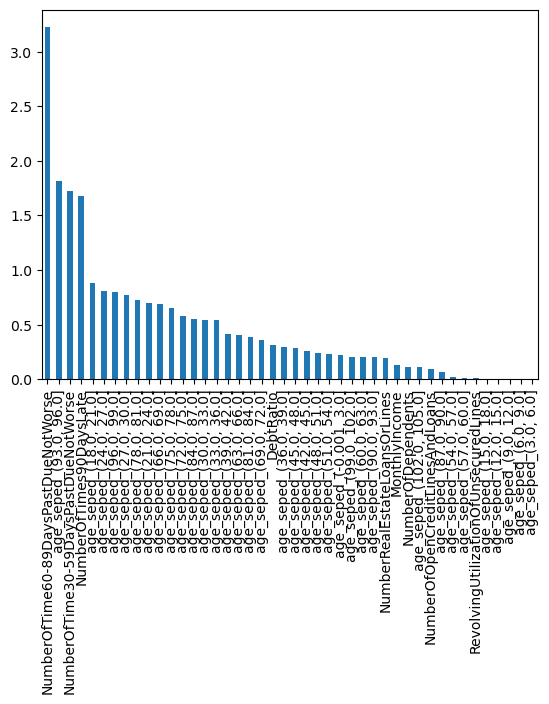

In [22]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

# 回归系数的数值与排序
coefs = pd.DataFrame(grid_search.best_estimator_.coef_,columns = X_p.columns)
coefs_abs = coefs.iloc[0,:].map(abs)
coefs_abs.sort_values(ascending=False).plot.bar()

In [23]:
#利用SelectFromModel选择特征
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(grid_search.best_estimator_, threshold=0.5, prefit=True)
X_selected = sfm.transform(X_train_s)

X_selected.shape

(76053, 16)

<Axes: >

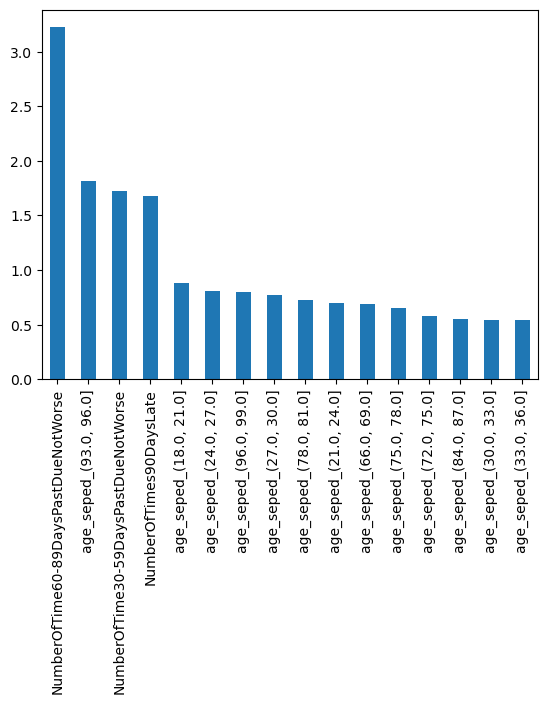

In [24]:
# 查看符合筛选标准的特征，以及对应的回归系数（绝对值）
coefs_abs.sort_values(ascending=False)[0:X_selected.shape[1]].plot.bar()

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [25]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# 定义显示方法，输出调参后形成的模型指标
def show_scores(grid_model,modelname,X_test,y_test):
    model=grid_model.best_estimator_
    y_score = model.predict_proba(X_test).T[1]
    y_pred  = model.predict(X_test)
    
    #计算并输出相应结果      
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label = 1)
    prec  = precision_score(y_test, y_pred, pos_label = 1)
    f1score = f1_score(y_test,y_pred,pos_label=1)
    cmatrix = confusion_matrix(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_score)
    print(  f"Best {modelname} params:{grid_model.best_params_}\n"
            f"Best {modelname} score:{grid_model.best_score_}\n"
            f"Confusion_Matrix:\n"
            f"{cmatrix}\n"
            f"Accuracy:\t{acc}\n"
            f"Recall:\t\t{recall}\n"
            f"Precision:\t{prec}\n"
            f"F1_score:\t{f1score}\n"
            f"AUCofROC:\t{roc_auc}\n")


##### 随机森林

In [28]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

param_grid_frst = {'n_estimators': [3,10,30,100],
                   'criterion': ["gini", "entropy", "log_loss"],
                   }

# 定义网格搜索方法
grid_forest = GridSearchCV(RandomForestClassifier(n_jobs=5), param_grid_frst, cv=5)

grid_forest.fit(X_train_s, y_train)

show_scores(grid_forest,'Random Forest',X_test_s,y_test)

Best Random Forest params:{'criterion': 'gini', 'n_estimators': 100}
Best Random Forest score:0.9337961839530037
Confusion_Matrix:
[[30218   206]
 [ 1874   297]]
Accuracy:	0.9361865316766376
Recall:		0.136803316444035
Precision:	0.5904572564612326
F1_score:	0.22213911742707557
AUCofROC:	0.8236859101029722



##### KNN

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': [3,5,7,9],
                   'leaf_size': [15,20,25,30,35,40],
                   'p':[0,1,2]
                   }

# 定义网格搜索方法
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# 训练
grid_knn.fit(X_train_s, y_train)

show_scores(grid_knn,'K-Nearest Neighbors',X_test_s,y_test)

C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\zzl96\anaconda3\Lib\site-packag

Best K-Nearest Neighbors params:{'leaf_size': 15, 'n_neighbors': 9, 'p': 2}
Best K-Nearest Neighbors score:0.9330203906642011
Confusion_Matrix:
[[30309   115]
 [ 2052   119]]
Accuracy:	0.9335174106458046
Recall:		0.05481345002303086
Precision:	0.5085470085470085
F1_score:	0.09896049896049897
AUCofROC:	0.6850908510857086



##### SVM

In [ ]:
# SVM
param_grid_svm = {'C': [0.1,1,10,100],
                   'kernel': ['linear','poly'],
                   }

# 定义网格搜索方法
grid_svm = GridSearchCV(SVC(probability = True), param_grid_svm, cv=5)

# 训练
grid_svm.fit(X_train_s, y_train)

show_scores(grid_svm,'Support Vector Machines',X_test_s,y_test)